# RentHop - Data Cleansing and EDA

In [1]:
"""
Author - Lily Elizabeth John
Date - 03/29/2017
Project - Kaggle - Renthop - Women Who Code - Workshop
"""

'\nAuthor - Lily Elizabeth John\nDate - 03/29/2017\nProject - Kaggle - Renthop - Women Who Code - Workshop\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
#Read Datasets
train_df=pd.read_json("C:/Users/ljohn/Documents/2017/Personal/WWC - Kaggle/Exploring Train.JSON/train.json")
test_df=pd.read_json("C:/Users/ljohn/Documents/2017/Personal/WWC - Kaggle/Exploring Train.JSON/test.json")

### Summarize training dataset

In [4]:
train_df.head(2).T

,10,10000
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


In [5]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
train_df.shape

(49352, 15)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 99999
Data columns (total 14 columns):
bathrooms          74659 non-null float64
bedrooms           74659 non-null int64
building_id        74659 non-null object
created            74659 non-null object
description        74659 non-null object
display_address    74659 non-null object
features           74659 non-null object
latitude           74659 non-null float64
listing_id         74659 non-null int64
longitude          74659 non-null float64
manager_id         74659 non-null object
photos             74659 non-null object
price              74659 non-null int64
street_address     74659 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


### Explore target variable - Interest Level

In [9]:
train_df['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

([<matplotlib.patches.Wedge at 0x27ed4c50>,
  <matplotlib.text.Text at 0x289cb860>])

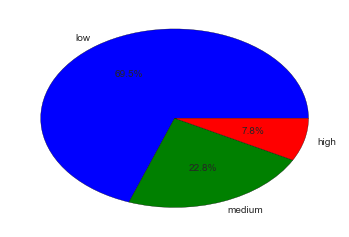

In [10]:
plt.pie(train_df['interest_level'].value_counts(),labels = train_df['interest_level'].value_counts().index,autopct="%1.1f%%")

There is a high ratio or low interest postings.

### Explore Price variable

In [11]:
train_df['price'].describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [12]:
print("Count: ",train_df['price'].count())
print("Min: ",train_df['price'].min())
print("Mean: ",train_df['price'].mean())
print("Median: ",train_df['price'].median())
print("Max: ",train_df['price'].max())

Count:  49352
Min:  43
Mean:  3830.174035500081
Median:  3150.0
Max:  4490000


(array([  4.93480000e+04,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  4.30000000e+01,   4.49038700e+05,   8.98034400e+05,
          1.34703010e+06,   1.79602580e+06,   2.24502150e+06,
          2.69401720e+06,   3.14301290e+06,   3.59200860e+06,
          4.04100430e+06,   4.49000000e+06]),
 <a list of 10 Patch objects>)

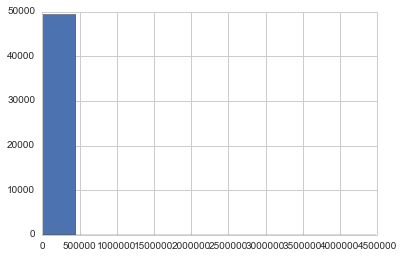

In [13]:
#Plot price to identify outliers
plt.hist(train_df['price'])

Outliers exist!!!

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


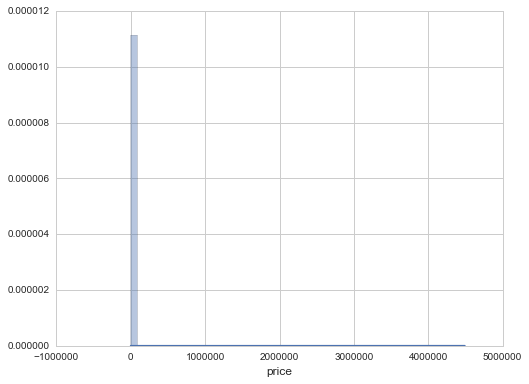

In [14]:
#Plot price distribution with outliers
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values,bins=50)
plt.xlabel('price', fontsize=12)
plt.show()

In [15]:
#Exclude top 1% datapoints to assess if outliers are removed
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


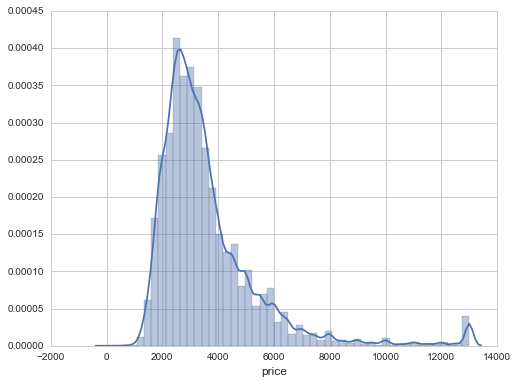

In [16]:
#Plot price distribution without outliers
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values,bins=50,kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [17]:
#2 Std Dev and 3 Std Dev outliers excluded
price3sd_df=train_df[((train_df.price - train_df.price.mean()) / train_df.price.std()).abs() < 3]
price2sd_df=train_df[((train_df.price - train_df.price.mean()) / train_df.price.std()).abs() < 2]

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


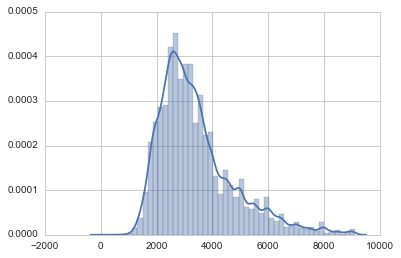

In [18]:
sns.distplot(price3sd_df.price.values,bins=50,kde=True)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


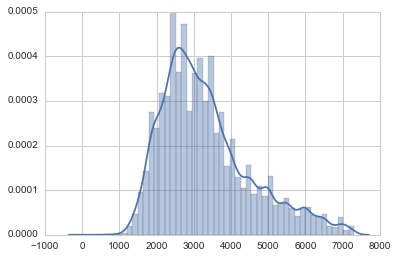

In [19]:
sns.distplot(price2sd_df.price.values,bins=50,kde=True)

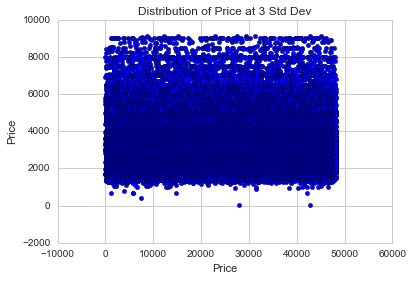

In [20]:
plt.scatter(range(price3sd_df.shape[0]),price3sd_df['price'].values)
plt.title("Distribution of Price at 3 Std Dev")
plt.xlabel("Price")
plt.ylabel("Price")

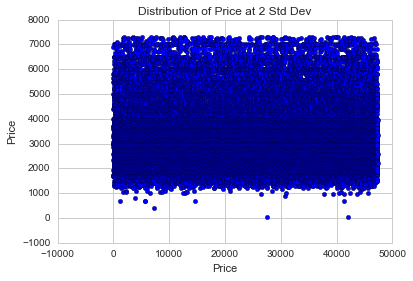

In [21]:
plt.scatter(range(price2sd_df.shape[0]),price2sd_df['price'].values)
plt.title("Distribution of Price at 2 Std Dev")
plt.xlabel("Price")
plt.ylabel("Price")

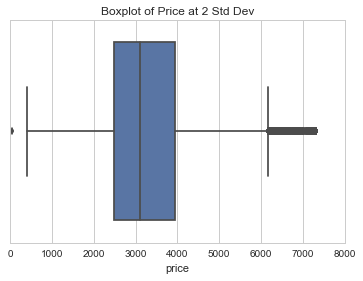

In [22]:
sns.boxplot(x=price2sd_df['price'])
plt.title("Boxplot of Price at 2 Std Dev")

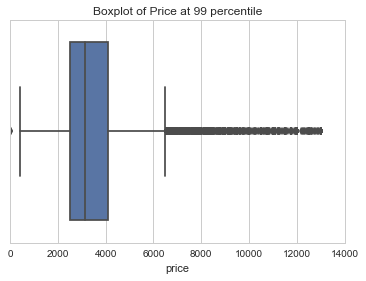

In [23]:
sns.boxplot(x=train_df['price'])
plt.title("Boxplot of Price at 99 percentile")

### Analyze the rest of the numerical variables

### Bedrooms & Bathrooms

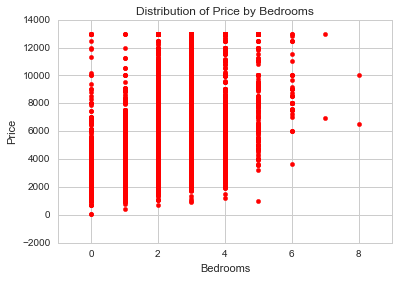

In [24]:
plt.scatter(train_df['bedrooms'],train_df['price'].values,color='red')
plt.title("Distribution of Price by Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

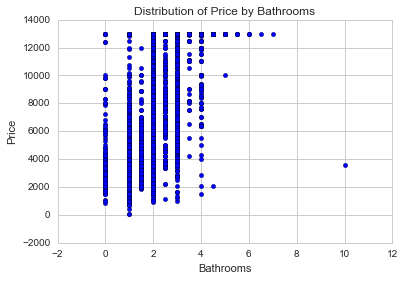

In [25]:
plt.scatter(train_df['bathrooms'],train_df['price'].values)
plt.title("Distribution of Price by Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")

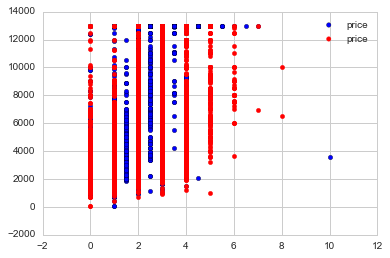

In [26]:
plt.scatter(train_df['bathrooms'],train_df['price'])
plt.scatter(train_df['bedrooms'],train_df['price'],color='red')
plt.legend()

### Explore Date Features

In [27]:
train_df['created']=pd.to_datetime(train_df['created'])
train_df['date']=train_df['created'].dt.date
train_df['month']=train_df['created'].dt.month
train_df['year']=train_df['created'].dt.year
train_df['day']=train_df['created'].dt.day
train_df['hour']=train_df['created'].dt.hour
train_df['weekday']=train_df['created'].dt.weekday
train_df['week']=train_df['created'].dt.week
train_df['quarter']=train_df['created'].dt.quarter

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

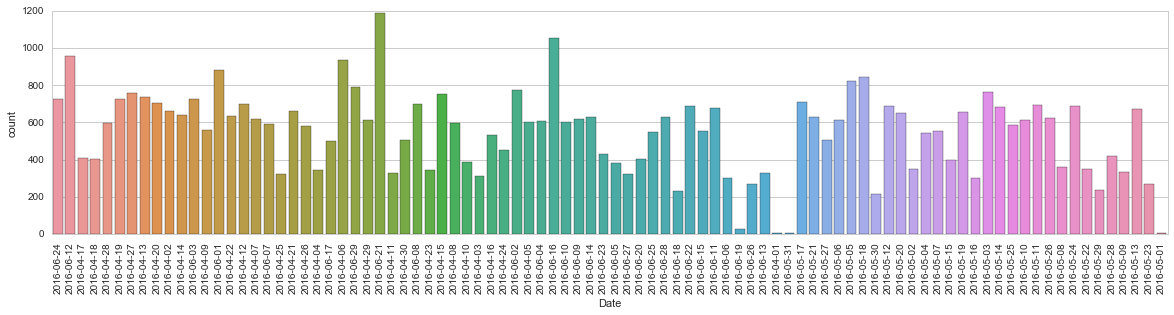

In [28]:
plt.figure(figsize=(20,4))
sns.countplot(train_df['date'])
plt.xlabel("Date")
plt.xticks(rotation=90)

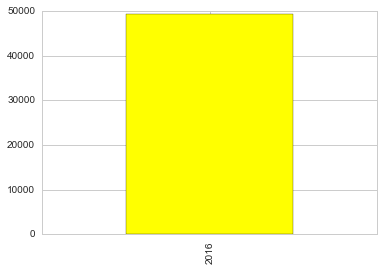

In [29]:
train_df['year'].value_counts().plot(kind='bar',color='yellow')

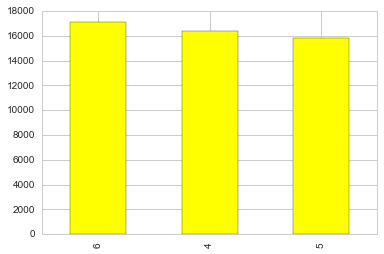

In [30]:
train_df['month'].value_counts().plot(kind='bar',color='yellow')

### Price, Bathrooms, Bedrooms, Date by Interest_Level

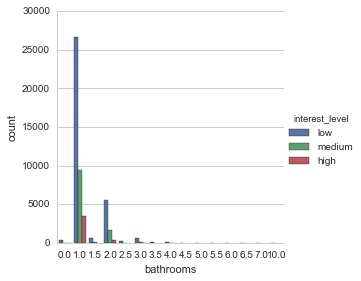

In [31]:
sns.factorplot('bathrooms',data=train_df,hue='interest_level',kind='count',hue_order=['low','medium','high'])

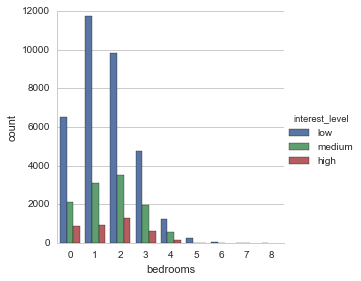

In [32]:
sns.factorplot('bedrooms',data=train_df,hue='interest_level',kind='count',hue_order=['low','medium','high'])

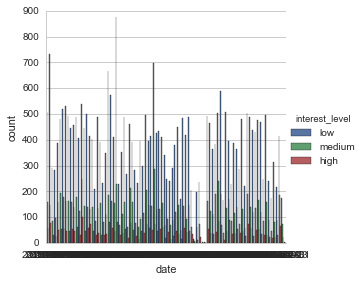

In [33]:
plt.figure(figsize=(20,8))
sns.factorplot('date',data=train_df,hue='interest_level',kind='count',hue_order=['low','medium','high'])
plt.show()

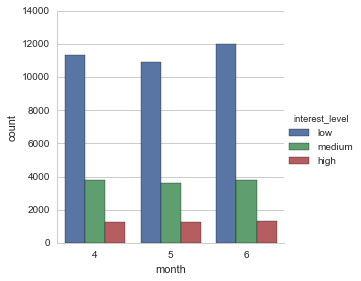

In [34]:
sns.factorplot('month',data=train_df,hue='interest_level',kind='count',hue_order=['low','medium','high'])

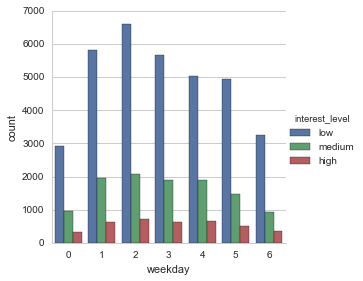

In [35]:
sns.factorplot('weekday',data=train_df,hue='interest_level',kind='count',hue_order=['low','medium','high'])

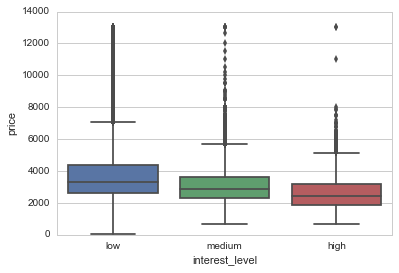

In [36]:
sns.boxplot(y=train_df['price'],x=train_df['interest_level'],order=['low','medium','high'])

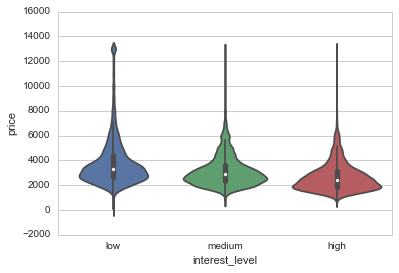

In [37]:
sns.violinplot(y=train_df['price'],x=train_df['interest_level'],order=['low','medium','high'])

### Latitude Longitude

In [47]:
#Plot on a map
count_vect = CountVectorizer(stop_words='english')
train_df_vectorcounts = count_vect.fit_transform(train_df.features)
print(count_vect.vocabulary_)

AttributeError: 'list' object has no attribute 'lower'

### Building Id

### Manager ID

### Photos

In [ ]:
#Photos per listing
train_df["num_photos"] = train_df["photos"].apply(len)

### Extract Features - Count Vectorizer

### Extract Description - Count Vectorizer